In [1]:
pip install qgrid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 889.2/889.2 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00
  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761251 sha256=27a630171f0e2e8653d0cb8f24dc7ad69367fb5038ae284d839f81b1a8912b34
  Stored in directory: /root/.cache/pip/wheels/b2/28/9b/c1053eb92a506d814e21f415d6ce4beab694a3efed99b500bc
Successfully built qgrid


In [76]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

import qgrid

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_hdf('/content/train.adult.h5')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int8  
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  bool  
 10  Capital Gain    32561 non-null  int16 
 11  Capital Loss    32561 non-null  int16 
 12  Hours per week  32561 non-null  int8  
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: bool(1), int16(2), int64(2), int8(2), object(8)
memory usage: 2.9+ MB


In [5]:
train.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,423.516600,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,3363.342471,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,-31441.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,27828.000000,4356.000000,99.000000


In [10]:
train.nunique()

,0
Age,73
Workclass,8
fnlwgt,21648
Education,16
Education-Num,16
Martial Status,7
Occupation,14
Relationship,6
Race,5
Sex,2


In [11]:
train.Age.nunique()

73

In [12]:
train.value_counts()

Age  Workclass         fnlwgt  Education     Education-Num  Martial Status      Occupation         Relationship   Race                Sex    Capital Gain  Capital Loss  Hours per week  Country        Target
25   Private           195994  1st-4th       2              Never-married       Priv-house-serv    Not-in-family  White               False  0             0             40              Guatemala      <=50K     3
49   Self-emp-not-inc  43479   Some-college  10             Married-civ-spouse  Craft-repair       Husband        White               True   0             0             40              United-States  <=50K     2
23   Private           240137  5th-6th       3              Never-married       Handlers-cleaners  Not-in-family  White               True   0             0             55              Mexico         <=50K     2
90   Private           52386   Some-college  10             Never-married       Other-service      Not-in-family  Asian-Pac-Islander  True   0             0             35              United-States  <=50K     2
49   Private           31267   7th-8th       4              Married-civ-spouse  Craft-repair       Husband        White               True   0             0             40              United-States  <=50K     2
                                                                                                                                                                                                                 ..
31   Private           197689  HS-grad       9              Never-married       Other-service      Not-in-family  Black               False  0             0             38              United-States  <=50K     1
                       197672  Bachelors     13             Married-civ-spouse  Prof-specialty     Husband        White               True   0             0             40              United-States  <=50K     1
                       197252  7th-8th       4              Married-civ-spouse  Other-service      Husband        White               True   0             0             40              Mexico         <=50K     1
                       197023  Assoc-voc     11             Married-civ-spouse  Machine-op-inspct  Husband        Amer-Indian-Eskimo  True   0             0             40              United-States  <=50K     1
90   Self-emp-not-inc  282095  Some-college  10             Married-civ-spouse  Farming-fishing    Husband        White               True   0             0             40              United-States  <=50K     1
Name: count, Length: 30139, dtype: int64

In [13]:
train.Age.value_counts()

,count
Age,
36,898
31,888
34,886
23,877
35,876
...,...
83,6
88,3
85,3


In [16]:
train.sample(5)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
17349,32,Private,200700,Some-college,10,Never-married,Sales,Not-in-family,White,True,0,0,50,United-States,<=50K
27081,62,Private,138253,Masters,14,Never-married,Handlers-cleaners,Not-in-family,White,True,4650,0,40,United-States,<=50K
2815,50,Private,237735,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,True,0,0,37,Mexico,<=50K
24577,45,Private,473171,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,True,0,0,40,United-States,<=50K
20830,33,Private,188352,Masters,14,Never-married,Prof-specialty,Not-in-family,Black,True,0,0,50,United-States,<=50K


### Braki w danych

In [23]:
train.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [22]:
def check_missing():
    for column in train.columns:
        missing = column, train[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)

check_missing()

('Workclass', 1836)
('Occupation', 1843)
('Country', 583)


In [24]:
train = train.fillna(-1)

In [25]:
check_missing()

###Metryka sukcesu: Dokładność (ang. accuracy)

In [26]:
values = [
      #odpowiedź          #predykcja
    ([1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0]), #dokładność 100%
    ([1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0]), #dokładność 50%
    ([1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1]), #dokładność 50%
    ([1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 1, 1]), #dokładność ~67%
]

for true_values, pred_values in values:
    score = accuracy_score(true_values, pred_values)
    print("score: [{0}], true: {1}, pred: {2}".format(score, true_values, pred_values))

score: [1.0], true: [1, 1, 1, 0, 0, 0], pred: [1, 1, 1, 0, 0, 0]
score: [0.5], true: [1, 1, 1, 0, 0, 0], pred: [0, 0, 0, 0, 0, 0]
score: [0.5], true: [1, 1, 1, 0, 0, 0], pred: [1, 1, 1, 1, 1, 1]
score: [0.6666666666666666], true: [1, 1, 1, 0, 0, 0], pred: [1, 1, 1, 0, 1, 1]


### DummyClassifier

In [27]:
train['target_cat'] = (train['Target'] != '<=50K').astype('int8') # True zostanie przekształcone na 1; False zostanie przekształcone na 0

X = train[ ['Age'] ].values # To macierz, dlatego są podwójne nawiasy, natomiast teraz to jest macierz z jedną kolumną
y = train[ 'target_cat' ].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (22792, 1) (22792,)
Test: (9769, 1) (9769,)


In [28]:
def train_and_predict(model, X, y, test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [29]:
train_and_predict(DummyClassifier(strategy = 'stratified'), X, y, test_size=0.33)

0.6403930801514996

### LogisticRegression

In [33]:
train_and_predict(LogisticRegression(random_state=1, max_iter=1000), X, y, test_size=0.33)

0.7585218548469649

### Feature Engineering

In [34]:
train['Race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

`one-hot-encoding` - polecenie `pd.get_dummies()` w Pandas przekształca dane kategoryczne w dane numeryczne, tworząc kolumny binarne dla każdej unikalnej wartości w oryginalnej kolumnie.

In [41]:
pd.get_dummies(train['Race']).head(10)

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,True,False,False
4,False,False,True,False,False
5,False,False,False,False,True
6,False,False,True,False,False
7,False,False,False,False,True
8,False,False,False,False,True
9,False,False,False,False,True


### Label Encoding

In [42]:
pd.factorize( ['a', 'b', 'c', 'a', 'a', 'c'] )

<ipython-input-42-85e5e86b7d15>:1: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.factorize( ['a', 'b', 'c', 'a', 'a', 'c'] )


(array([0, 1, 2, 0, 0, 2]), array(['a', 'b', 'c'], dtype=object))

In [43]:
pd.factorize( train['Workclass'] )[0]

array([0, 1, 2, ..., 2, 2, 6])

In [45]:
train.Workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', -1, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [46]:
train.Workclass = train.Workclass.map(lambda x: str(x))

le = LabelEncoder()
le.fit(train['Workclass'])
le.transform(train['Workclass'])

array([7, 6, 4, ..., 4, 4, 5])

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int8  
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  bool  
 10  Capital Gain    32561 non-null  int16 
 11  Capital Loss    32561 non-null  int16 
 12  Hours per week  32561 non-null  int8  
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
 15  target_cat      32561 non-null  int8  
dtypes: bool(1), int16(2), int64(2), int8(3), object(8)
memory usage: 3.0+ MB


In [51]:
train.select_dtypes(include=[object]).columns

Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Country', 'Target'],
      dtype='object')

In [54]:
train['Workclass'][0]

'State-gov'

In [55]:
train['Workclass']

,Workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private
...,...
32556,Private
32557,Private
32558,Private
32559,Private


In [52]:
cat_feats = train.select_dtypes(include=[object]).columns

for cat_feat in cat_feats:
    train['{0}_cat'.format(cat_feat)] = pd.factorize(train[cat_feat])[0]

In [53]:
train.head(5)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,...,Target,target_cat,Workclass_cat,Education_cat,Martial Status_cat,Occupation_cat,Relationship_cat,Race_cat,Country_cat,Target_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,True,...,<=50K,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,...,<=50K,0,1,0,1,1,1,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,True,...,<=50K,0,2,1,2,2,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,True,...,<=50K,0,2,2,1,2,1,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,False,...,<=50K,0,2,0,1,3,2,1,1,0


In [58]:
feats = train.select_dtypes(include=[int]).columns.values
feats

array(['fnlwgt', 'Education-Num', 'Workclass_cat', 'Education_cat',
       'Martial Status_cat', 'Occupation_cat', 'Relationship_cat',
       'Race_cat', 'Country_cat', 'Target_cat'], dtype=object)

In [59]:
feats = feats[:-1] #-1 oznacza ostatni element, który wycinamy
feats

array(['fnlwgt', 'Education-Num', 'Workclass_cat', 'Education_cat',
       'Martial Status_cat', 'Occupation_cat', 'Relationship_cat',
       'Race_cat', 'Country_cat'], dtype=object)

In [61]:
X = train[ feats ].values
y = train['Target_cat'].values

### LogisticRegression

In [64]:
train_and_predict(LogisticRegression(random_state=1, max_iter=1000), X, y, test_size=0.33)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7679394001433105

In [67]:
train_and_predict(LogisticRegression(solver='liblinear', random_state=1, max_iter=1000), X, y, test_size=0.33)

0.772852902037056

### Szukanie nowych cech

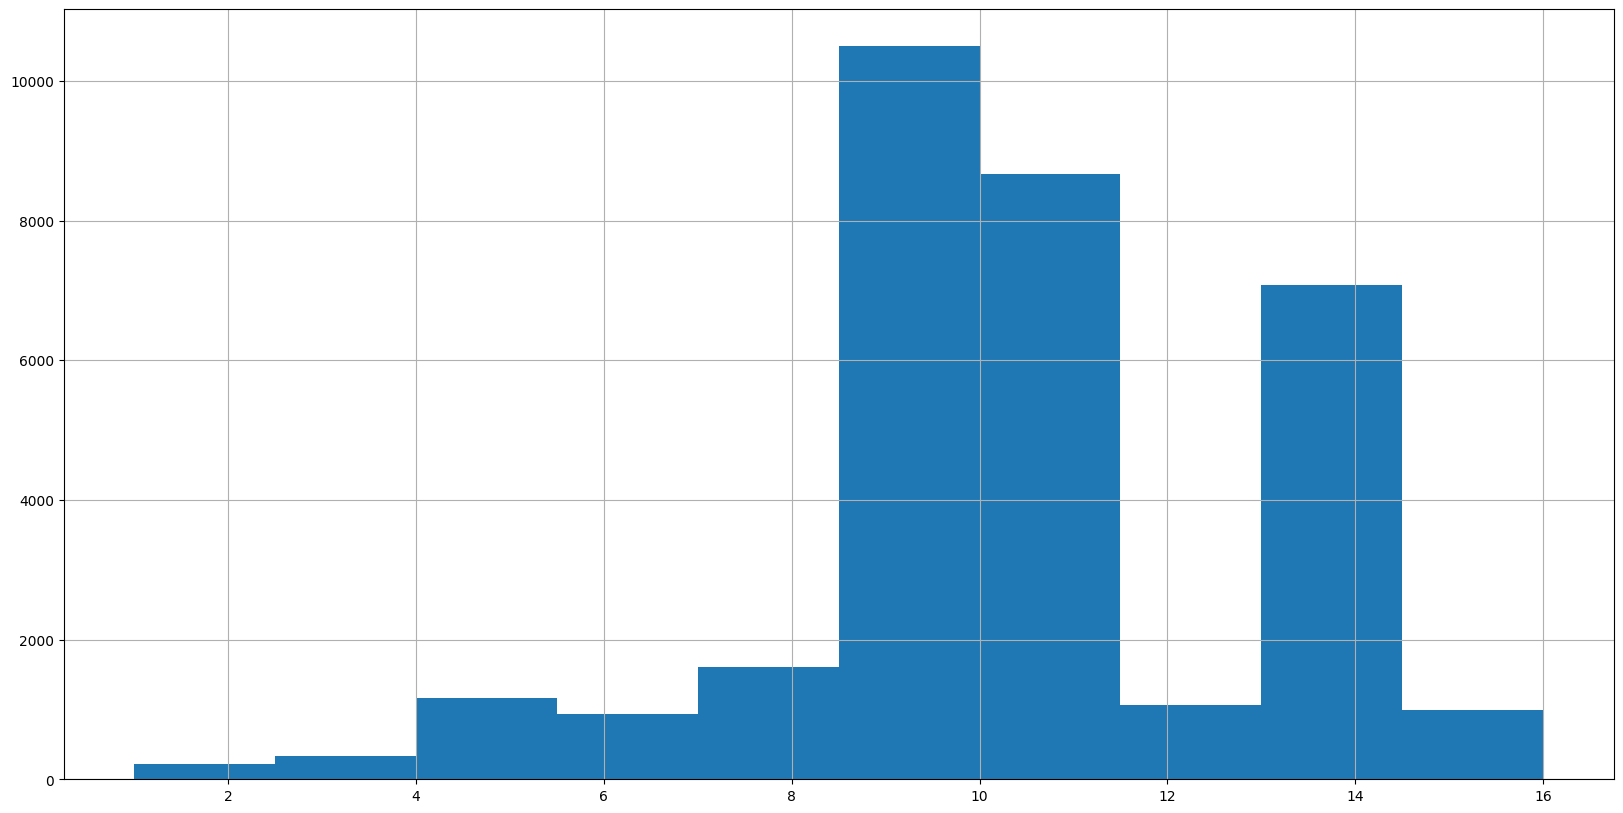

In [68]:
train['Education-Num'].hist();

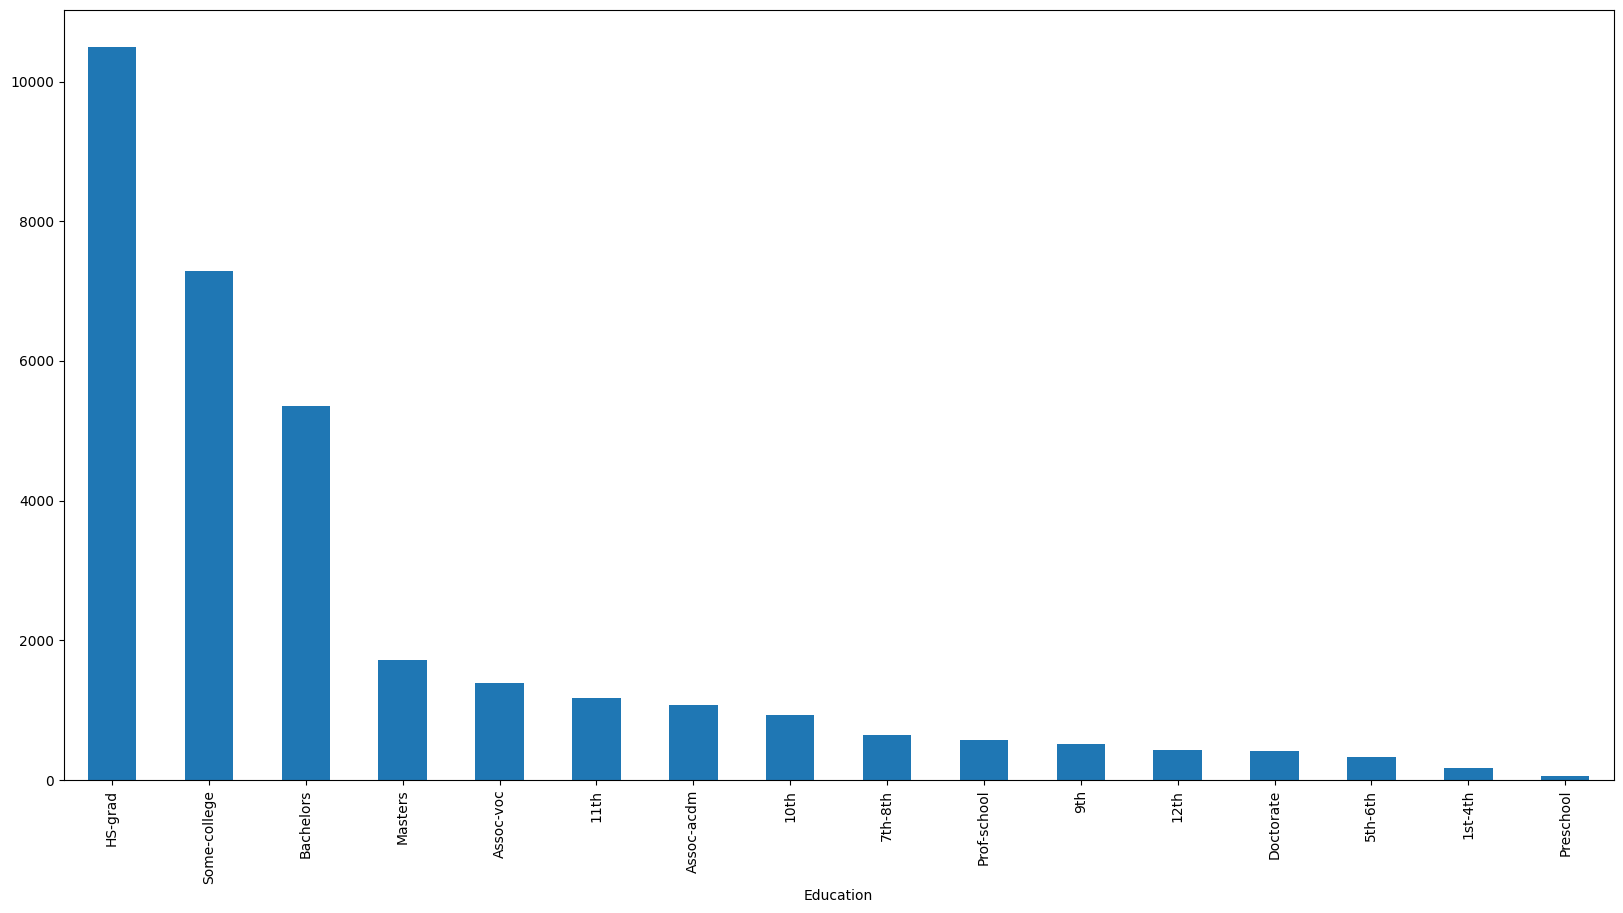

In [69]:
train['Education'].value_counts().plot(kind='bar');

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target',
       'target_cat', 'Workclass_cat', 'Education_cat', 'Martial Status_cat',
       'Occupation_cat', 'Relationship_cat', 'Race_cat', 'Country_cat',
       'Target_cat'],
      dtype='object')


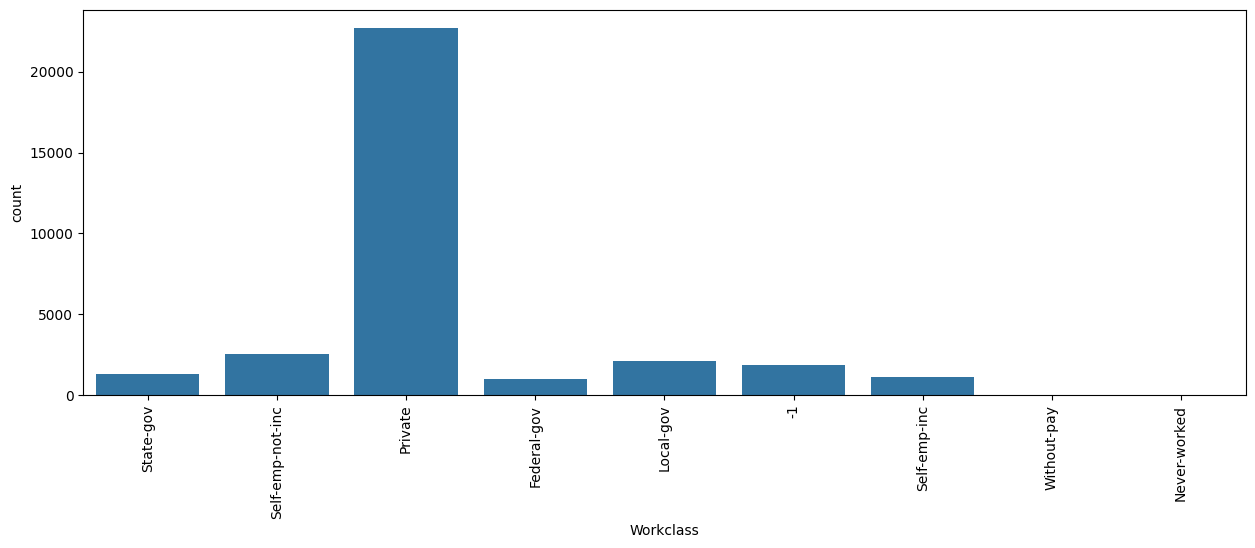

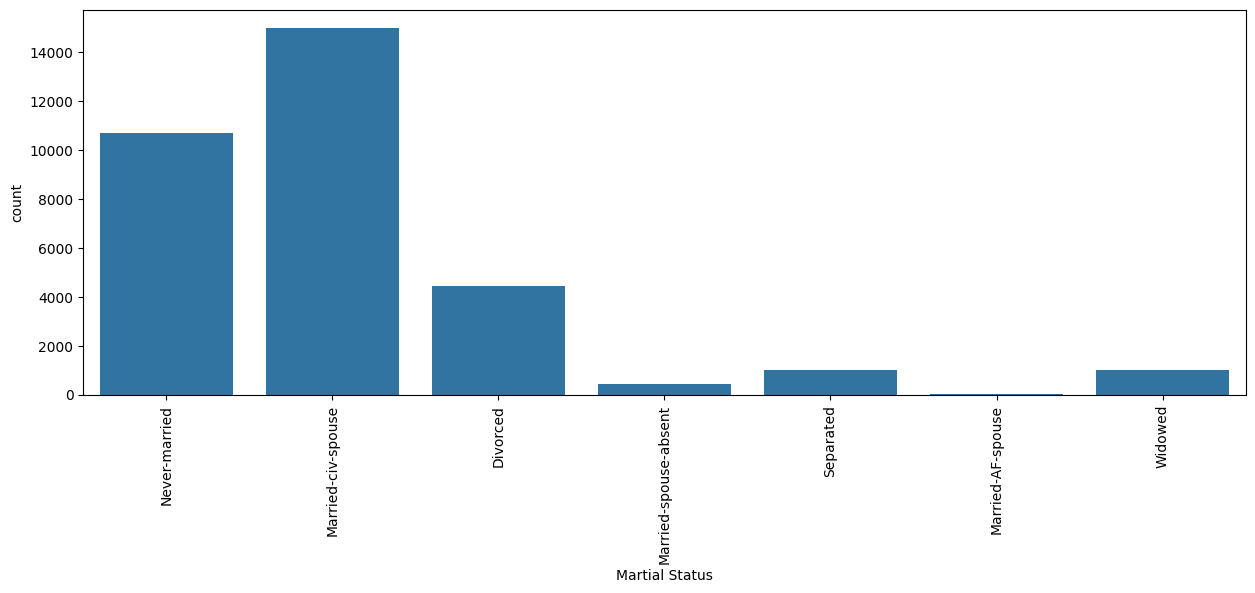

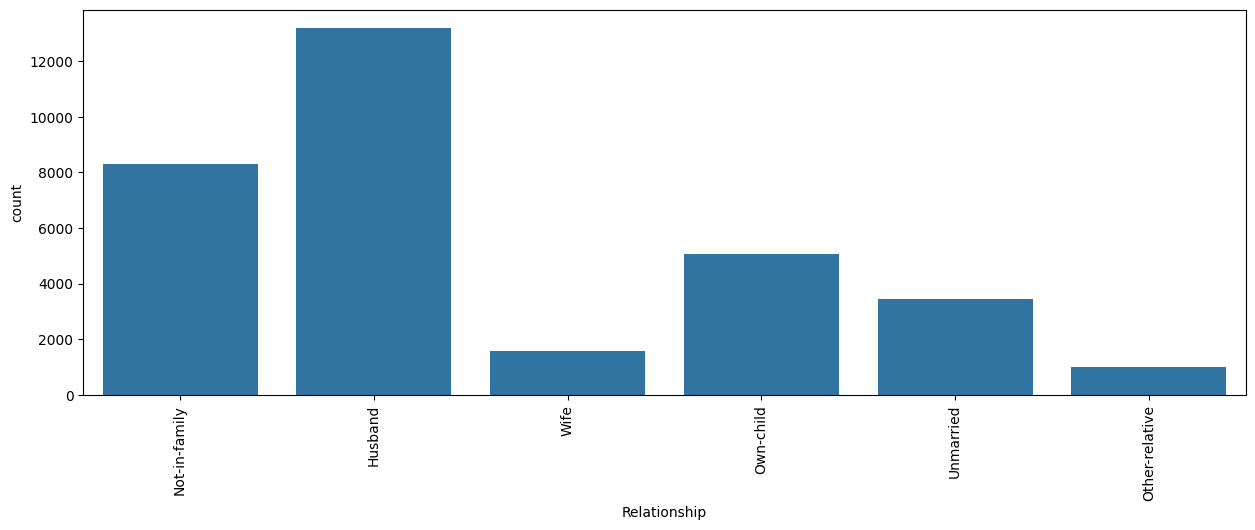

In [70]:
print(train.columns)


plt.figure(figsize=(15, 5))
sns.countplot(x='Workclass', data=train);
plt.xticks(rotation=90);
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(x='Martial Status', data=train);
plt.xticks(rotation=90);
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(x='Relationship', data=train);
plt.xticks(rotation=90);
plt.show()

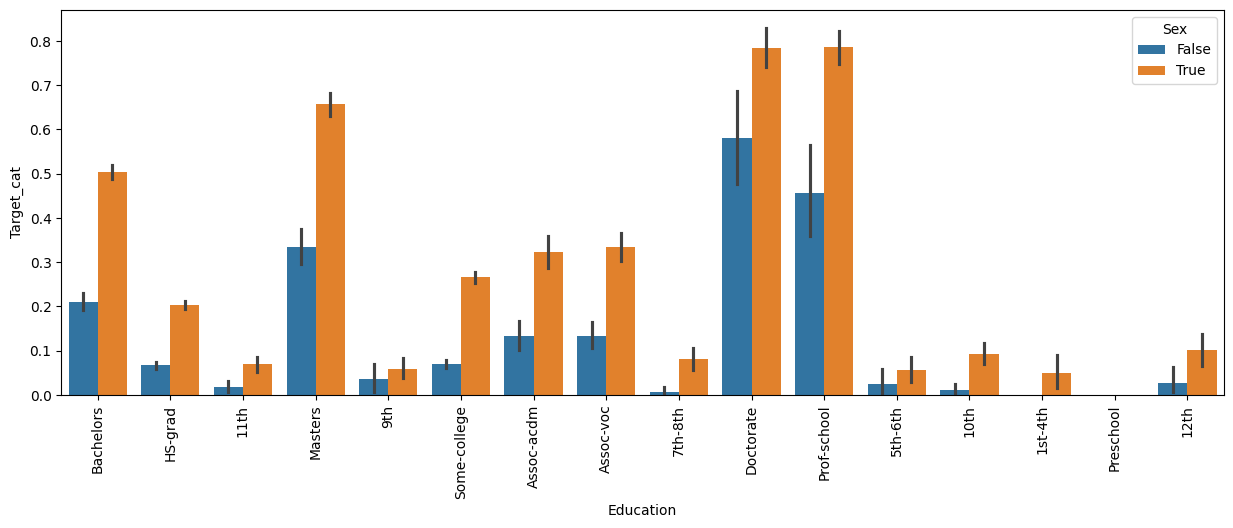

In [71]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Education", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

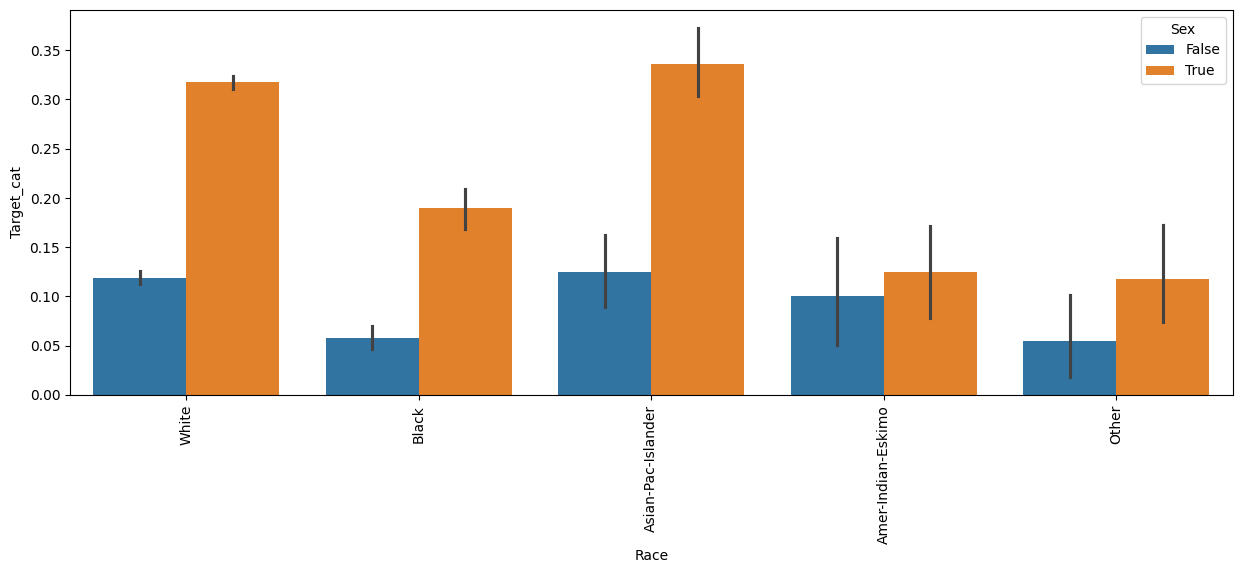

In [72]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Race", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

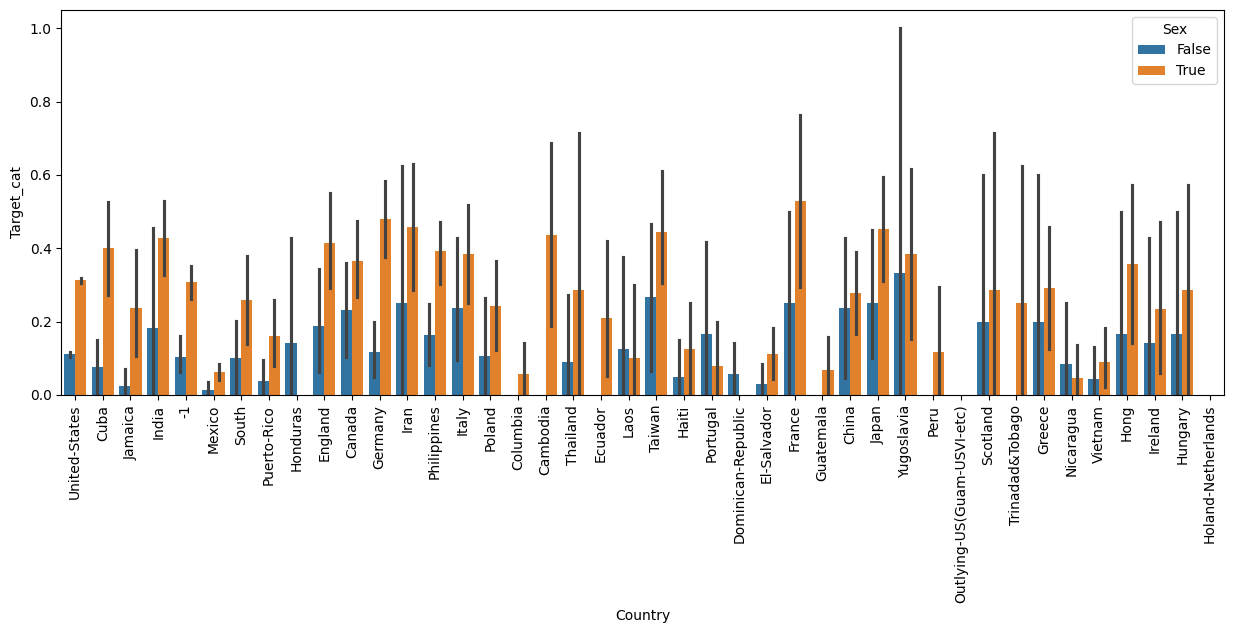

In [73]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Country", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

### Dodanie nowych cech

In [74]:
train["relationship_race"] = train.apply(lambda x: "{}-{}".format(x["Relationship"], x["Race"]), axis=1)
train["relationship_race_cat"] = train["relationship_race"].factorize()[0]

### DecisionTreeClassifier

In [77]:
train_and_predict(DecisionTreeClassifier(max_depth=5), X, y, test_size=0.33)

0.826696693622684